### Illustration of Sequential Bayesian Learning for a Simple Linear Model (Update)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal

In [10]:
inter = -0.3
slope = 0.5
mu = 0
var = 0.04
sigma = np.sqrt(var)

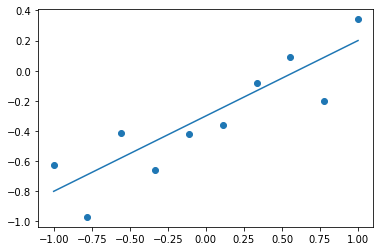

In [4]:
x_n = np.linspace(-1, 1, 10)
y = []
for i in x_n:
  y.append(slope*i + inter + np.random.normal(mu, sigma))

plt.scatter(x_n, y)
plt.plot(x_n, slope*x_n + inter)
plt.show()

In [32]:
def likelihood(x, y, w0, w1):
  k = np.sqrt(2*np.pi) * sigma
  return k * np.exp(-0.5 * ((y - (w0 + w1*x))/sigma)**2)

def post(s0, m0, phi, beta, t):
  s0Inv = np.linalg.inv(s0)
  Sn = np.linalg.inv(s0Inv + beta * phi.T @ phi)
  inner_term = s0Inv @ (m0.reshape((2, 1))) + beta * phi.T * t
  Mn = Sn @ inner_term
  return Mn.reshape((1, 2))[0], Sn

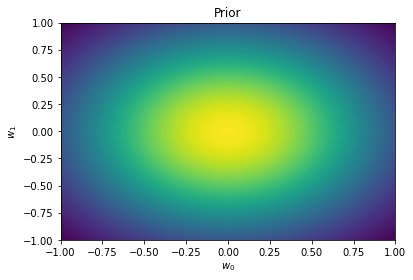

In [33]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
prior = multivariate_normal([0, 0], [[slope, 0], [0, slope]])
prior = prior.pdf(np.dstack((w0, w1)))
plt.contourf(w0, w1, prior, 100)
plt.title('Prior')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.show()

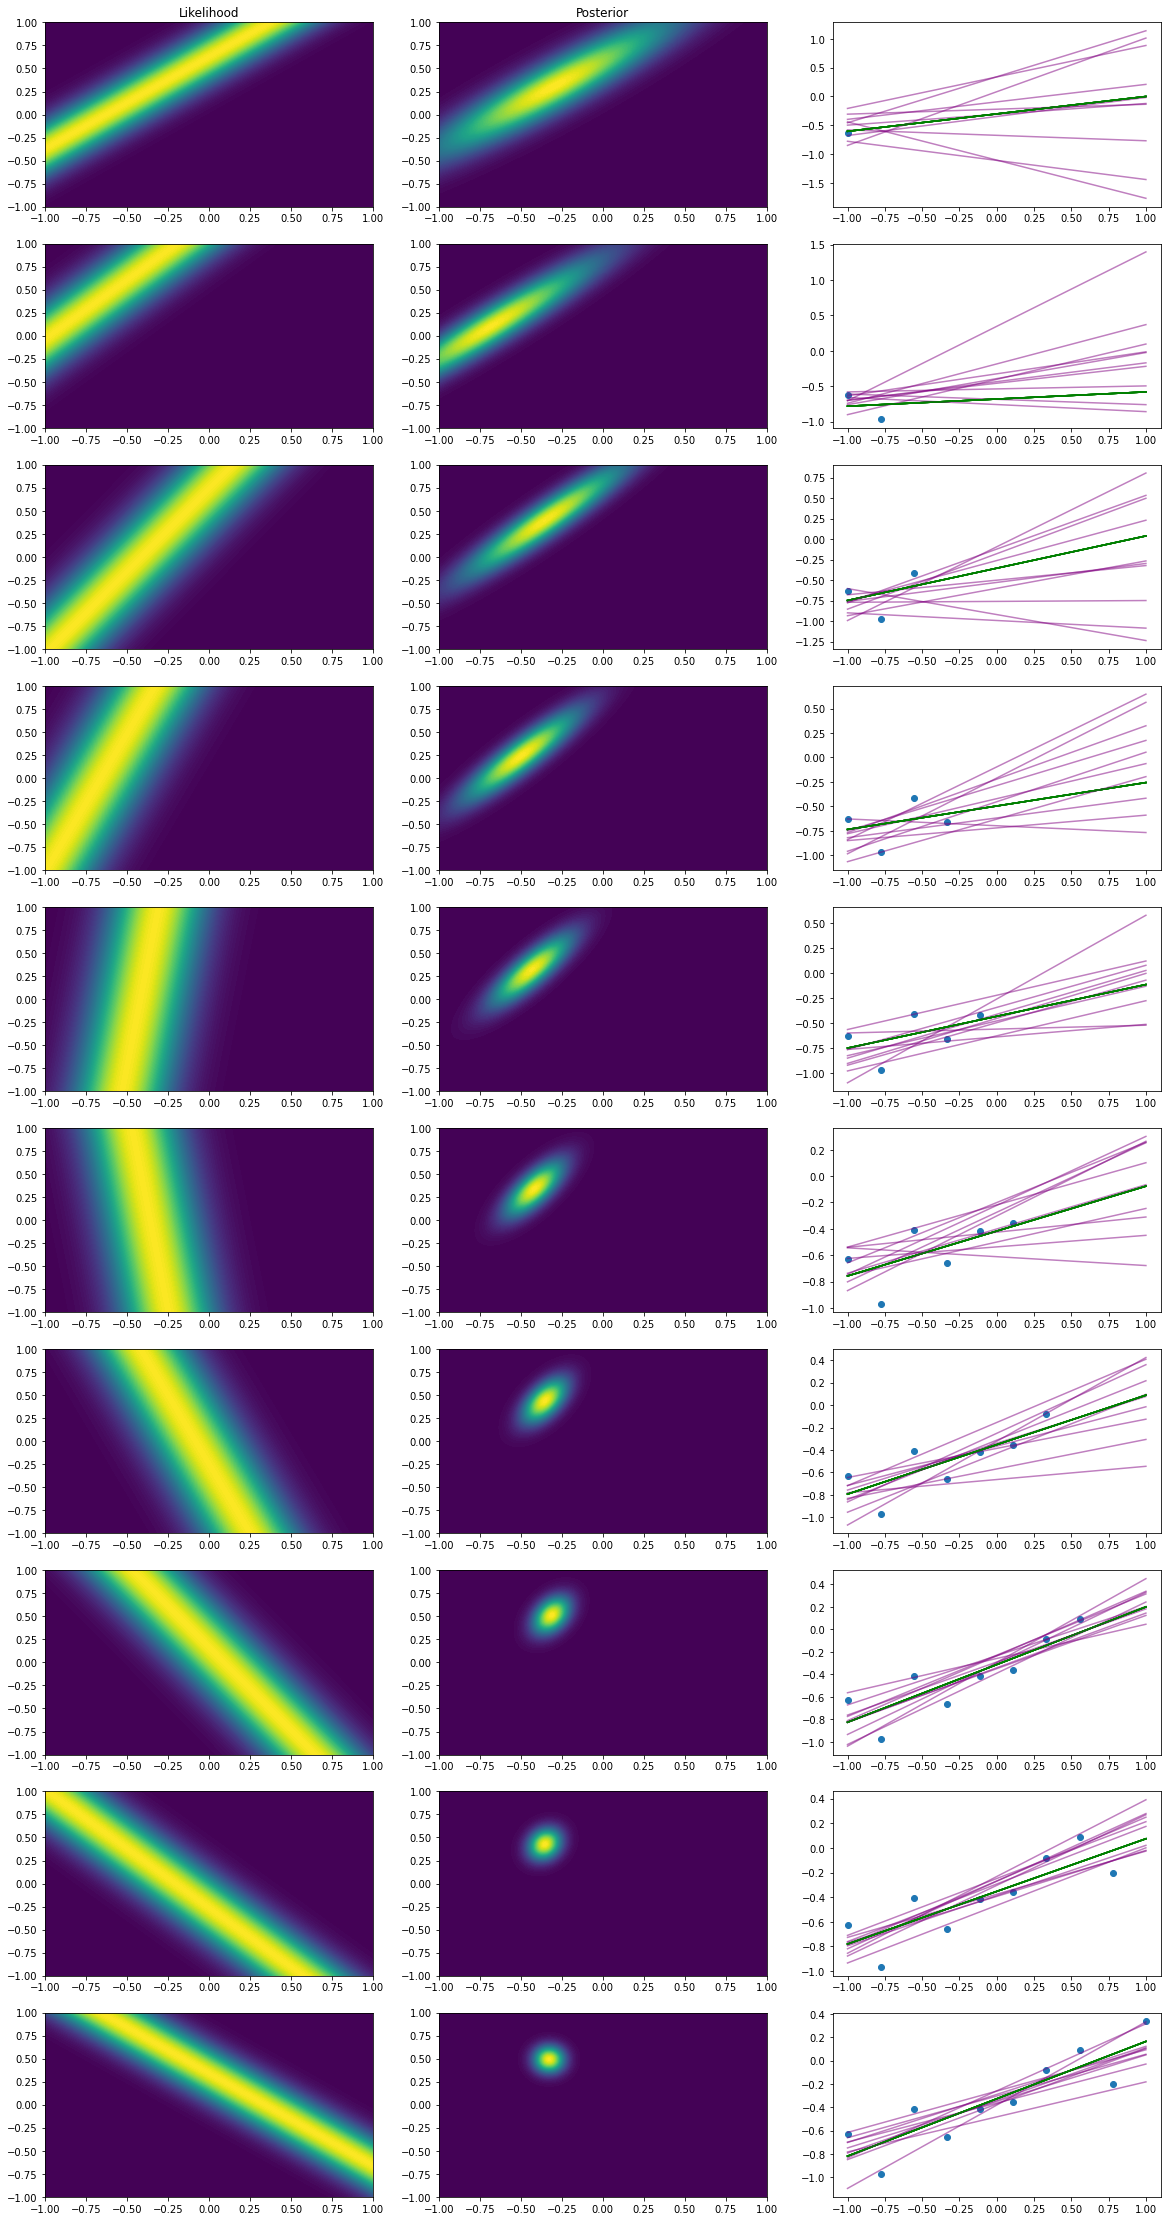

In [34]:
axis = 0
beta = 25
m0, s0 = np.array([0, 0]), np.array([[slope, 0], [0, slope]])
fig, axs = plt.subplots(10, 3, figsize=(20, 40))
axs[0, 0].set_title("Likelihood")
axs[0, 1].set_title("Posterior")
X = []
Y = []
for i, j in zip(x_n, y):
  mle = likelihood(i, j, w0, w1)
  posterior = prior * mle
  prior = posterior
  phi = np.array([1, i]).reshape((1, 2))
  m0, s0 = post(s0, m0, phi, beta, j)
  dist = multivariate_normal.rvs(m0, s0, 10)
  X.append(i)
  Y.append(j)
  axs[axis, 0].contourf(w0, w1, mle, 100)
  axs[axis, 1].contourf(w0, w1, posterior, 100)
  for line in dist:
    axs[axis, 2].plot(x_n, line[0] + line[1] * x_n, color='purple', alpha=0.5)
    axs[axis, 2].plot(x_n, m0[0] + m0[1] * x_n, color='green', alpha=0.7)
  axs[axis, 2].scatter(X, Y)
  axis += 1
plt.show()